# Student Performance Analysis
## Libraries

In [6]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [7]:
# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

## Basic Visualization

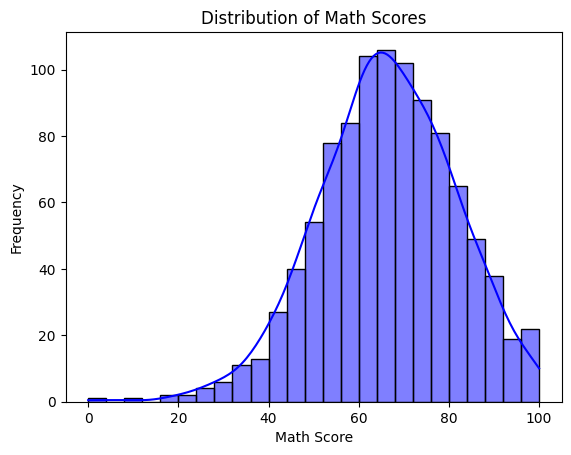

In [8]:
## Plot the distribution of math scores
sns.histplot(df["math score"], kde = True, color = "blue")
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

C:\Users\abiga\AppData\Local\Temp\ipykernel_21572\69368346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='Set3')


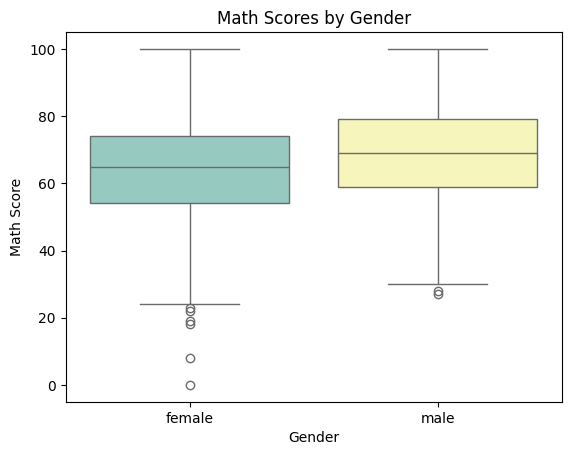

In [9]:
# Compare math scores by gender
sns.boxplot(x='gender', y='math score', data=df, palette='Set3')
plt.title('Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

C:\Users\abiga\AppData\Local\Temp\ipykernel_21572\3079799972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental level of education', y='math score', data=df, palette='coolwarm')


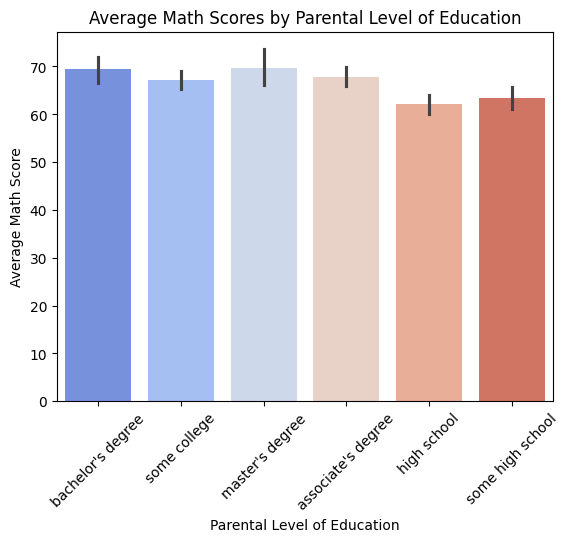

In [10]:
# Plot the average math score by parental level of education
sns.barplot(x='parental level of education', y='math score', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Math Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Math Score')
plt.show()

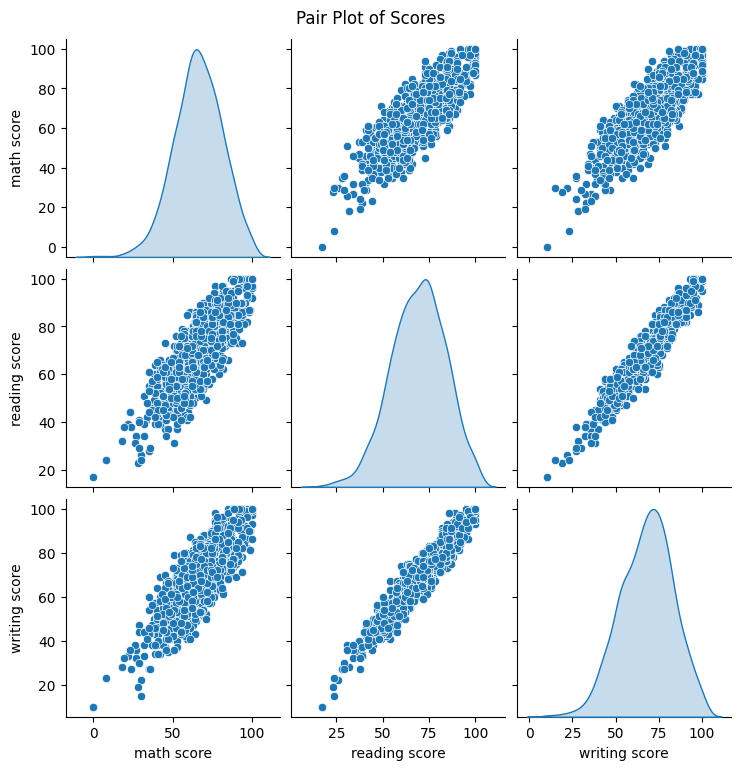

In [11]:
# Pair plot to visualize relationships between scores
sns.pairplot(df[['math score', 'reading score', 'writing score']], diag_kind='kde')
plt.suptitle('Pair Plot of Scores', y=1.02)
plt.show()

In [12]:
# Compute the correlation matrix
corr_matrix = df[['math score', 'reading score', 'writing score']].corr()
corr_matrix

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


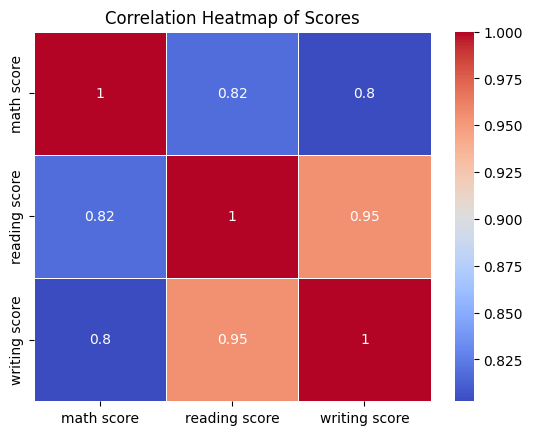

In [13]:
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Scores')
plt.show()

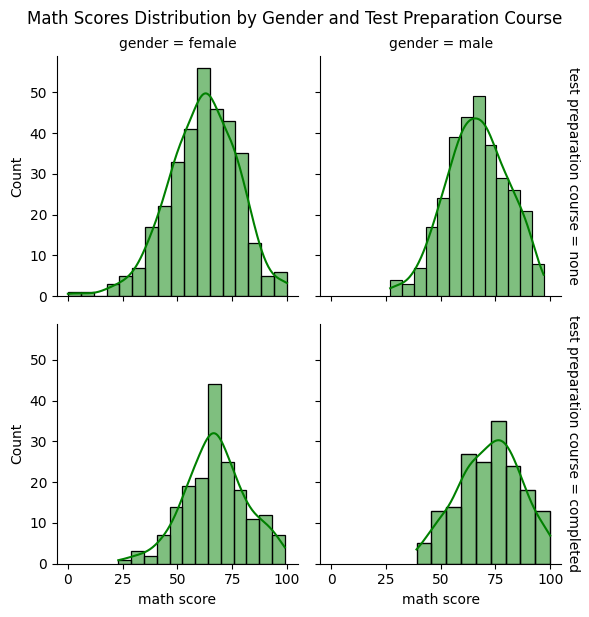

In [14]:
# Facet grid to compare math scores distribution across genders and test preparation course
g = sns.FacetGrid(df, col='gender', row='test preparation course', margin_titles=True)
g.map(sns.histplot, 'math score', kde=True, color='green')
g.fig.suptitle('Math Scores Distribution by Gender and Test Preparation Course', y=1.02)
plt.show()

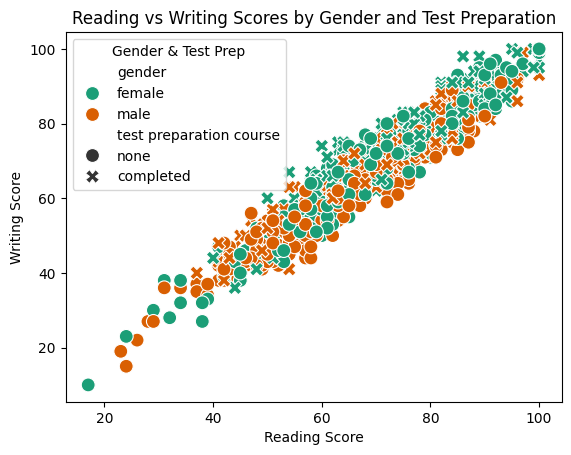

In [15]:
# Scatter plot with customizations
sns.scatterplot(x='reading score', y='writing score', hue='gender', style='test preparation course', data=df, palette='Dark2', s=100)
plt.title('Reading vs Writing Scores by Gender and Test Preparation')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend(title='Gender & Test Prep')
plt.show()

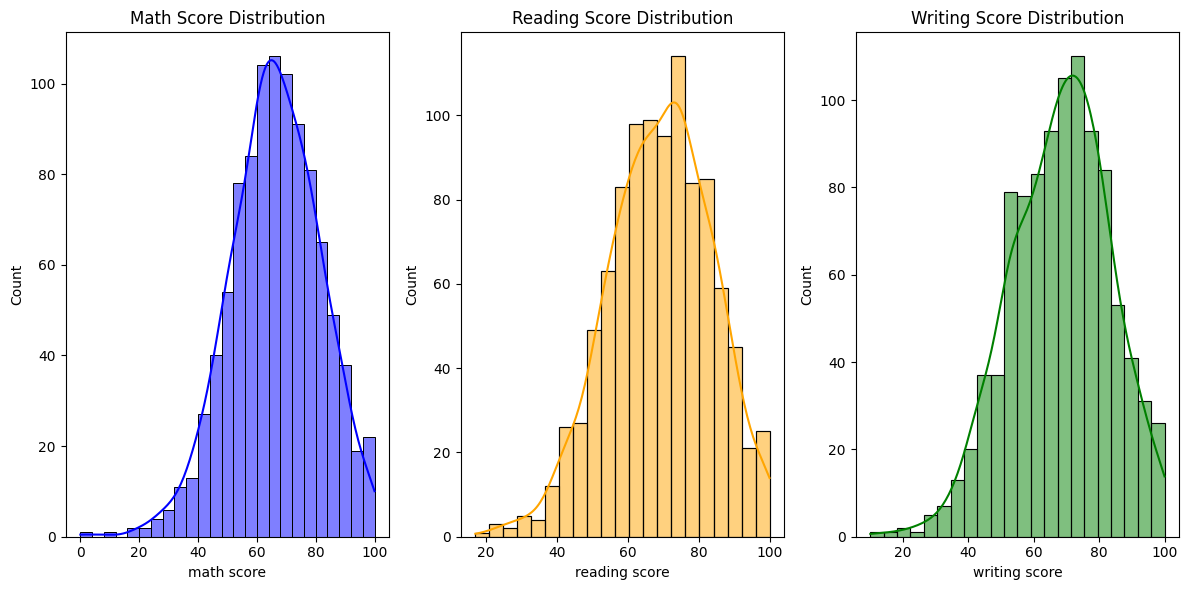

In [16]:
# Create a figure with multiple plots
plt.figure(figsize=(12, 6))

# Math Score Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Math Score Distribution')

# Reading Score Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='orange')
plt.title('Reading Score Distribution')

# Writing Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='green')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

# Feature Engineering
## Binary Features

In [17]:
df['high_math_score'] = df['math score'] > 70
df['high_reading_score'] = df['reading score'] > 70
df['high_writing_score'] = df['writing score'] > 70
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,high_math_score,high_reading_score,high_writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,True,True,True
1,female,group C,some college,standard,completed,69,90,88,False,True,True
2,female,group B,master's degree,standard,none,90,95,93,True,True,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,False,False,False
4,male,group C,some college,standard,none,76,78,75,True,True,True


## Combine Features

In [18]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,high_math_score,high_reading_score,high_writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,True,True,True,72.666667
1,female,group C,some college,standard,completed,69,90,88,False,True,True,82.333333
2,female,group B,master's degree,standard,none,90,95,93,True,True,True,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,False,False,False,49.333333
4,male,group C,some college,standard,none,76,78,75,True,True,True,76.333333


# Correlation Analysis and Feature Selection

## Encoding Categorical Variables

In [19]:
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)
df_encoded.head()

,math score,reading score,writing score,high_math_score,high_reading_score,high_writing_score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,True,True,True,72.666667,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,True,True,82.333333,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,True,True,True,92.666667,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,False,False,False,49.333333,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,True,True,76.333333,True,False,True,False,False,False,False,False,True,False,True,True


## Correlation Matrix

In [20]:
corr_matrix = df_encoded.corr()
corr_matrix

,math score,reading score,writing score,high_math_score,high_reading_score,high_writing_score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
math score,1.000000,0.817580,0.802642,0.780638,0.653536,0.629729,0.918746,0.167982,-0.084250,-0.073387,0.050071,0.205855,0.079664,-0.128725,0.060417,0.037056,-0.079852,0.350877,-0.177702
reading score,0.817580,1.000000,0.954598,0.632769,0.804458,0.757957,0.970331,-0.244313,-0.060283,-0.003074,0.035177,0.106712,0.096024,-0.151068,0.106452,0.010782,-0.071369,0.229560,-0.241780
writing score,0.802642,0.954598,1.000000,0.612286,0.762791,0.795072,0.965667,-0.301225,-0.078254,-0.010203,0.082032,0.089077,0.128297,-0.182211,0.125693,0.027989,-0.097326,0.245769,-0.312946
high_math_score,0.780638,0.632769,0.612286,1.000000,0.580485,0.554245,0.710267,0.133446,-0.064200,-0.091141,0.053865,0.184620,0.043589,-0.101368,0.077675,-0.001793,-0.032015,0.243274,-0.119782
high_reading_score,0.653536,0.804458,0.762791,0.580485,1.000000,0.791047,0.777284,-0.199132,-0.074101,0.024240,0.020047,0.102748,0.071529,-0.113156,0.053213,0.014054,-0.053092,0.175122,-0.207215
high_writing_score,0.629729,0.757957,0.795072,0.554245,0.791047,1.000000,0.764440,-0.260346,-0.069809,-0.014922,0.080033,0.081935,0.094549,-0.143520,0.094550,0.004532,-0.045168,0.192507,-0.262807
average_score,0.918746,0.970331,0.965667,0.710267,0.777284,0.764440,1.000000,-0.130861,-0.078247,-0.030691,0.058902,0.141050,0.106599,-0.161936,0.102411,0.026761,-0.087247,0.290064,-0.256710
gender_male,0.167982,-0.244313,-0.301225,0.133446,-0.199132,-0.260346,-0.130861,1.000000,-0.028466,-0.063368,0.030566,0.020302,-0.011638,0.037952,-0.046188,-0.004460,0.008990,0.021372,-0.006028
race/ethnicity_group B,-0.084250,-0.060283,-0.078254,-0.064200,-0.074101,-0.069809,-0.078247,-0.028466,1.000000,-0.331479,-0.288574,-0.195411,-0.019121,0.069093,-0.056363,-0.036203,0.026531,-0.008257,0.000106
race/ethnicity_group C,-0.073387,-0.003074,-0.010203,-0.091141,0.024240,-0.014922,-0.030691,-0.063368,-0.331479,1.000000,-0.407797,-0.276145,0.015682,0.007977,0.001630,-0.015872,-0.045339,-0.003385,-0.012522


## Feature Importance with Random Forest

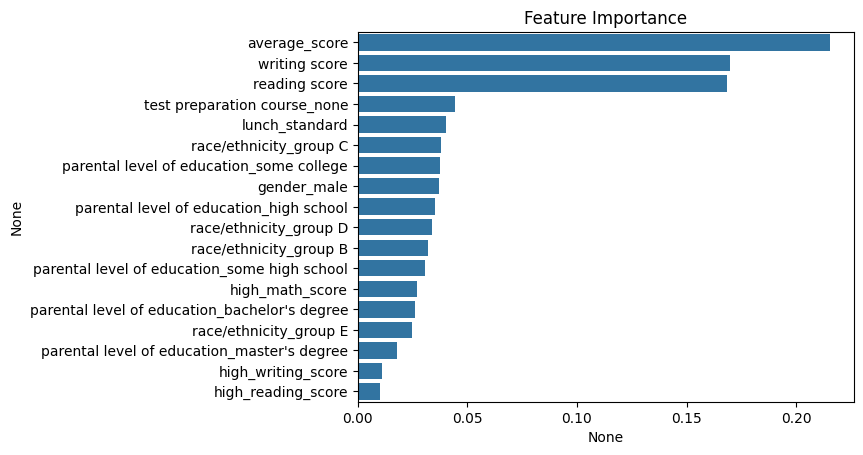

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['math score'])
y = df_encoded['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

# Predictive Modeling

## Regression Models

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.9193467326784925e-27


### Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 12.635


## Classification Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_encoded['passed_math'] = df_encoded['math score'] >= 50
X = df_encoded.drop(columns=['passed_math', 'math score'])
y = df_encoded['passed_math']

model = LogisticRegression(max_iter=50000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Model Evaluation

## For Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MSE: {mse}, R2: {r2}')


## For Classification

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(report)

# Hyperparameter Tuning

## Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Params: {grid_search.best_params_}')

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')


# Clustering

In [ ]:
from sklearn.cluster import KMeans

X = df[['math score', 'reading score', 'writing score']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)

sns.scatterplot(x='math score', y='reading score', hue='cluster', data=df, palette='viridis')
plt.title('Clustering of Students Based on Scores')
plt.show()

# Dimensionality Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster']

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('PCA of Student Scores')
plt.show()

# Advanced Visualization

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='reading score', y='writing score', color='gender', 
                 size='math score', hover_data=['parental level of education'])
fig.show()
